In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [111]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-03-13 15:58:42--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

100%[======================================>] 50,264      --.-K/s   in 0.05s   

2022-03-13 15:58:43 (951 KB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [112]:
dataset["sex"] = pd.to_numeric(df["sex"])
dataset["region"] = pd.to_numeric(df["region"])
dataset["smoker"] = pd.to_numeric(df["smoker"])
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [201]:
train_dataset = dataset.iloc[:1200]
test_dataset = dataset.iloc[1200:]

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [207]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

In [222]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(12,activation=tf.nn.relu),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1),
])

In [223]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='mae',
              metrics=['mae','mse'])

In [225]:
model.fit(train_dataset, train_labels, epochs=10)

Epoch 1/10
38/38 [==============================] - 0s 1ms/step - loss: 1973.0256 - mae: 1973.0256 - mse: 24117430.0000
Epoch 2/10
38/38 [==============================] - 0s 1ms/step - loss: 1962.5640 - mae: 1962.5640 - mse: 24333768.0000
Epoch 3/10
38/38 [==============================] - 0s 1ms/step - loss: 1965.8950 - mae: 1965.8950 - mse: 24287054.0000
Epoch 4/10
38/38 [==============================] - 0s 1ms/step - loss: 1960.3184 - mae: 1960.3184 - mse: 24411130.0000
Epoch 5/10
38/38 [==============================] - 0s 1ms/step - loss: 1976.6156 - mae: 1976.6156 - mse: 24109100.0000
Epoch 6/10
38/38 [==============================] - 0s 1ms/step - loss: 1966.9219 - mae: 1966.9219 - mse: 24071918.0000
Epoch 7/10
38/38 [==============================] - 0s 1ms/step - loss: 1976.0533 - mae: 1976.0533 - mse: 24307944.0000
Epoch 8/10
38/38 [==============================] - 0s 1ms/step - loss: 1949.5778 - mae: 1949.5778 - mse: 24066788.0000
Epoch 9/10
38/38 [======================

5/5 - 0s - loss: 2347.6453 - mae: 2347.6453 - mse: 31901254.0000
Testing set Mean Abs Error: 2347.65 expenses
You passed the challenge. Great job!


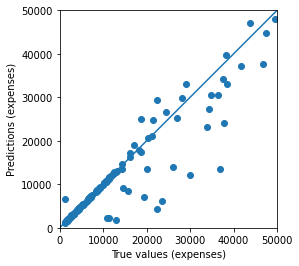

In [226]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
